In [39]:
# Importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# For neural network we shall use keras library
import keras
#import math 

In [40]:
# Importing cleaned data
df = pd.read_csv('C:/Users/Varinder/Desktop/Mimic iii Dataset/CSV_Files/FINAL_DATASET.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sr_Num                7543 non-null   int64 
 1   SUBJECT_ID            7543 non-null   int64 
 2   HADM_ID               7543 non-null   int64 
 3   ADMITTIME             7543 non-null   object
 4   DISCHTIME             7543 non-null   object
 5   LOS_Hospital          7543 non-null   object
 6   ADMISSION_TYPE        7543 non-null   object
 7   ADMISSION_TYPE2       7543 non-null   int64 
 8   EDREGTIME             7543 non-null   object
 9   EDOUTTIME             7543 non-null   object
 10  ED_LOS_In_Seconds     7543 non-null   int64 
 11  ED_LOS_In_Mins        7543 non-null   int64 
 12  LOS_EmergencyDept     7543 non-null   object
 13  DIAGNOSIS             7543 non-null   object
 14  DIAGNOSIS_CODE        7543 non-null   int64 
 15  HOSPITAL_EXPIRE_FLAG  7543 non-null   

#### We have 7543 observations in our dataset 

In [42]:
df.isnull().any()

Sr_Num                  False
SUBJECT_ID              False
HADM_ID                 False
ADMITTIME               False
DISCHTIME               False
LOS_Hospital            False
ADMISSION_TYPE          False
ADMISSION_TYPE2         False
EDREGTIME               False
EDOUTTIME               False
ED_LOS_In_Seconds       False
ED_LOS_In_Mins          False
LOS_EmergencyDept       False
DIAGNOSIS               False
DIAGNOSIS_CODE          False
HOSPITAL_EXPIRE_FLAG    False
ICD9_CODES              False
dtype: bool


#### None of the column contains NULL value

In [43]:
df.head()

,Sr_Num,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,LOS_Hospital,ADMISSION_TYPE,ADMISSION_TYPE2,EDREGTIME,EDOUTTIME,ED_LOS_In_Seconds,ED_LOS_In_Mins,LOS_EmergencyDept,DIAGNOSIS,DIAGNOSIS_CODE,HOSPITAL_EXPIRE_FLAG,ICD9_CODES
0,4278,20957,113808,6/24/2100 22:37,7/3/2100 12:31,8 days 13 hrs 54 mins,EMERGENCY,1,6/24/2100 13:37,6/25/2100 0:10,37980,633,0 days 10 hrs 33 mins,BILATERAL PNEUMONIA,311,0,"4,865,559,790,799,660"
1,6291,41552,120254,7/5/2100 13:52,7/8/2100 15:45,3 days 1 hrs 53 mins,EMERGENCY,1,7/5/2100 11:33,7/5/2100 14:49,11760,196,0 days 3 hrs 16 mins,ANEMIA,136,0,"2851,5533,5849,5853,27652,40390,53100,60784,V1..."
2,14411,72723,146616,7/9/2100 10:43,7/17/2100 15:00,8 days 4 hrs 17 mins,EMERGENCY,1,7/9/2100 5:56,7/9/2100 15:55,35940,599,0 days 9 hrs 59 mins,ABDOMINAL PAIN,16,0,"4,109,571,557,235,730,000,000,000,000,000,000,..."
3,4066,42357,113129,7/14/2100 2:04,7/18/2100 14:25,4 days 12 hrs 21 mins,EMERGENCY,1,7/13/2100 22:36,7/14/2100 4:18,20520,342,0 days 5 hrs 42 mins,CHOLANGITIS,513,0,"3,895,702,762,276,820,000,000,000,000,000,000,..."
4,2430,12834,107726,7/14/2100 20:52,7/22/2100 17:06,7 days 20 hrs 14 mins,EMERGENCY,1,7/14/2100 12:15,7/15/2100 2:41,51960,866,0 days 14 hrs 26 mins,CIRRHOSIS,533,0,"2,113,286,940,194,590,000,000,000,000,000,000,000"


#### Our target variable will be LOS(in minutes), And we will predict LOS on the basis of diagnosis code

#### Overview of our data. How our data is placed in dataset. 

In [44]:
print('We have {} number of unique admissions in our dataset.'.format(df['HADM_ID'].nunique()))

We have 7543 number of unique admissions in our dataset.


#### We have the data of 7543 unique patients. Means no patient's data is repeating.

In [45]:
print('We have {} number of unique diseases in our dataset.'.format(df['DIAGNOSIS_CODE'].nunique()))

We have 598 number of unique diseases in our dataset.


#### We have 598 diagnosis for 7543 patients.

#### Now we are checking how many types of emergency admissions we have in hospital

In [46]:
df['ADMISSION_TYPE'].value_counts()

EMERGENCY    7514
URGENT         23
ELECTIVE        6
Name: ADMISSION_TYPE, dtype: int64

#### We have 3 types of admissions for emergency department. 
Sudden new entry in hospital is named as emergency.
Urgent means patient is already admitted in hospital but need some emergency treatment. 
Elective patient is called by appointment.

#### Checking the death rate in emergency department

In [47]:
print("{} Patients died in the emergency department from {} patients".format(df['HOSPITAL_EXPIRE_FLAG'].sum(),df['HADM_ID'].nunique()))

855 Patients died in the emergency department from 7543 patients


In [48]:
print("{:.2f}% Patients died in the emergency department".format((df['HOSPITAL_EXPIRE_FLAG'].sum()/df['HADM_ID'].nunique())*100))

11.34% Patients died in the emergency department


#### 855 out of total 7543 patients died in emergency depatment. That is 11.34% death ratio.

#### Now, we are checking the outliers for our target variable (LOS)

In [49]:
df['ED_LOS_In_Mins'].describe()

count    7543.000000
mean      361.620310
std       263.671425
min     -1246.000000
25%       203.000000
50%       307.000000
75%       442.000000
max      3282.000000
Name: ED_LOS_In_Mins, dtype: float64

In [50]:
# Data about patients who have lef the hospital.
df[df['ED_LOS_In_Mins'] <= 0].count()

Sr_Num                  5
SUBJECT_ID              5
HADM_ID                 5
ADMITTIME               5
DISCHTIME               5
LOS_Hospital            5
ADMISSION_TYPE          5
ADMISSION_TYPE2         5
EDREGTIME               5
EDOUTTIME               5
ED_LOS_In_Seconds       5
ED_LOS_In_Mins          5
LOS_EmergencyDept       5
DIAGNOSIS               5
DIAGNOSIS_CODE          5
HOSPITAL_EXPIRE_FLAG    5
ICD9_CODES              5
dtype: int64

In [51]:
df[df['ED_LOS_In_Mins'] <= 0]

,Sr_Num,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,LOS_Hospital,ADMISSION_TYPE,ADMISSION_TYPE2,EDREGTIME,EDOUTTIME,ED_LOS_In_Seconds,ED_LOS_In_Mins,LOS_EmergencyDept,DIAGNOSIS,DIAGNOSIS_CODE,HOSPITAL_EXPIRE_FLAG,ICD9_CODES
759,5286,13500,117078,12/2/2110 6:16,12/8/2110 3:06,5 days 20 hrs 50 mins,EMERGENCY,1,12/2/2110 0:19,12/1/2110 12:07,-43920,-732,#VALUE!,ACUTE KIDNEY FAILURE,66,0,"42,591,1760,2765,5770,5845,5990,28529,V1581"
3198,2158,13403,106842,1/17/2144 3:45,1/20/2144 17:08,3 days 13 hrs 23 mins,EMERGENCY,1,1/17/2144 1:24,1/16/2144 4:38,-74760,-1246,#VALUE!,CHEST PAIN,498,0,"2720,4019,41011,41401,V1507"
3862,21550,10904,169678,9/15/2152 7:27,9/22/2152 17:01,7 days 9 hrs 34 mins,EMERGENCY,1,9/15/2152 5:07,9/15/2152 5:00,-420,-7,#VALUE!,CHEST TRAUMA,500,0,"2851,8750,8912,9040,9042,81511,E970"
5063,7074,97518,122851,9/30/2168 19:22,10/14/2168 15:30,13 days 20 hrs 8 mins,EMERGENCY,1,9/30/2168 11:13,9/30/2168 11:13,0,0,0 days 0 hrs 0 mins,AORTIC ANEURYSM,164,0,"311,2724,2763,2869,2875,3051,3963,4019,4233,44..."
7159,7553,539,124411,3/30/2197 7:33,4/3/2197 14:25,4 days 6 hrs 52 mins,EMERGENCY,1,3/30/2197 2:11,3/29/2197 8:25,-63960,-1066,#VALUE!,CHEST PAIN,498,0,"4,124,280,599,025,000,000,000,000,000,000"


#### Above shown are the total 5 outliers(wrong or unnessary values) in our dataset. Now shall remove these observations from dataset, otherwise it will make negative impact on our predictions.

In [52]:
df = df[df['ED_LOS_In_Mins'] > 0]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7538 entries, 0 to 7542
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sr_Num                7538 non-null   int64 
 1   SUBJECT_ID            7538 non-null   int64 
 2   HADM_ID               7538 non-null   int64 
 3   ADMITTIME             7538 non-null   object
 4   DISCHTIME             7538 non-null   object
 5   LOS_Hospital          7538 non-null   object
 6   ADMISSION_TYPE        7538 non-null   object
 7   ADMISSION_TYPE2       7538 non-null   int64 
 8   EDREGTIME             7538 non-null   object
 9   EDOUTTIME             7538 non-null   object
 10  ED_LOS_In_Seconds     7538 non-null   int64 
 11  ED_LOS_In_Mins        7538 non-null   int64 
 12  LOS_EmergencyDept     7538 non-null   object
 13  DIAGNOSIS             7538 non-null   object
 14  DIAGNOSIS_CODE        7538 non-null   int64 
 15  HOSPITAL_EXPIRE_FLAG  7538 non-null   

In [54]:
df.head()

,Sr_Num,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,LOS_Hospital,ADMISSION_TYPE,ADMISSION_TYPE2,EDREGTIME,EDOUTTIME,ED_LOS_In_Seconds,ED_LOS_In_Mins,LOS_EmergencyDept,DIAGNOSIS,DIAGNOSIS_CODE,HOSPITAL_EXPIRE_FLAG,ICD9_CODES
0,4278,20957,113808,6/24/2100 22:37,7/3/2100 12:31,8 days 13 hrs 54 mins,EMERGENCY,1,6/24/2100 13:37,6/25/2100 0:10,37980,633,0 days 10 hrs 33 mins,BILATERAL PNEUMONIA,311,0,"4,865,559,790,799,660"
1,6291,41552,120254,7/5/2100 13:52,7/8/2100 15:45,3 days 1 hrs 53 mins,EMERGENCY,1,7/5/2100 11:33,7/5/2100 14:49,11760,196,0 days 3 hrs 16 mins,ANEMIA,136,0,"2851,5533,5849,5853,27652,40390,53100,60784,V1..."
2,14411,72723,146616,7/9/2100 10:43,7/17/2100 15:00,8 days 4 hrs 17 mins,EMERGENCY,1,7/9/2100 5:56,7/9/2100 15:55,35940,599,0 days 9 hrs 59 mins,ABDOMINAL PAIN,16,0,"4,109,571,557,235,730,000,000,000,000,000,000,..."
3,4066,42357,113129,7/14/2100 2:04,7/18/2100 14:25,4 days 12 hrs 21 mins,EMERGENCY,1,7/13/2100 22:36,7/14/2100 4:18,20520,342,0 days 5 hrs 42 mins,CHOLANGITIS,513,0,"3,895,702,762,276,820,000,000,000,000,000,000,..."
4,2430,12834,107726,7/14/2100 20:52,7/22/2100 17:06,7 days 20 hrs 14 mins,EMERGENCY,1,7/14/2100 12:15,7/15/2100 2:41,51960,866,0 days 14 hrs 26 mins,CIRRHOSIS,533,0,"2,113,286,940,194,590,000,000,000,000,000,000,000"


### Now we have dataset with no outliers
#### This is the distribution of LOS time 

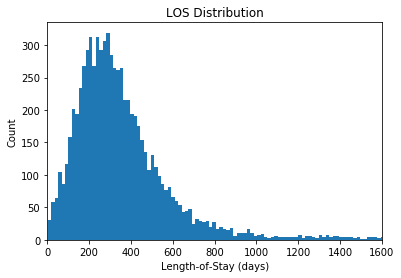

In [55]:
# Plot LOS Distribution
plt.hist(df['ED_LOS_In_Mins'], bins=200)
plt.xlim(0, 1600)
plt.title('LOS Distribution')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.show();

#### We are droping all the columns that contain non-numeric data or those have no relation with LOS

In [56]:
WT_drop = df.drop(['ADMISSION_TYPE','EDREGTIME','EDOUTTIME','DIAGNOSIS','ICD9_CODES','ADMITTIME','DISCHTIME','LOS_Hospital','LOS_EmergencyDept'],axis=1)
WT_drop

,Sr_Num,SUBJECT_ID,HADM_ID,ADMISSION_TYPE2,ED_LOS_In_Seconds,ED_LOS_In_Mins,DIAGNOSIS_CODE,HOSPITAL_EXPIRE_FLAG
0,4278,20957,113808,1,37980,633,311,0
1,6291,41552,120254,1,11760,196,136,0
2,14411,72723,146616,1,35940,599,16,0
3,4066,42357,113129,1,20520,342,513,0
4,2430,12834,107726,1,51960,866,533,0
...,...,...,...,...,...,...,...,...
7538,16800,12567,154272,1,16560,276,240,0
7539,25727,18250,183165,1,14640,244,240,0
7540,27061,4843,187638,1,15060,251,447,0
7541,1237,19338,103944,1,40920,682,123,0


### Defining target variable

In [57]:
X = WT_drop.drop(columns = 'ED_LOS_In_Mins')
y = WT_drop[['ED_LOS_In_Mins']]

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7538 entries, 0 to 7542
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sr_Num                7538 non-null   int64
 1   SUBJECT_ID            7538 non-null   int64
 2   HADM_ID               7538 non-null   int64
 3   ADMISSION_TYPE2       7538 non-null   int64
 4   ED_LOS_In_Seconds     7538 non-null   int64
 5   DIAGNOSIS_CODE        7538 non-null   int64
 6   HOSPITAL_EXPIRE_FLAG  7538 non-null   int64
dtypes: int64(7)
memory usage: 471.1 KB


In [59]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7538 entries, 0 to 7542
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ED_LOS_In_Mins  7538 non-null   int64
dtypes: int64(1)
memory usage: 117.8 KB


In [60]:
y.head()

,ED_LOS_In_Mins
0,633
1,196
2,599
3,342
4,866


# Model building
#### Spliting data into training and testing sets with the ratio of 80% and 20%

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Random forest 

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
forest = RandomForestRegressor(n_estimators=100, random_state=0, min_samples_split=35,max_features=2)

In [64]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=35, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [65]:
print("Accuracy on training set: {:.2f}%".format(forest.score(X_train, y_train)*100)) 
print("Accuracy on test set: {:.2f}%".format(forest.score(X_test, y_test)*100))

Accuracy on training set: 95.63%
Accuracy on test set: 95.57%


# Gradient boosting

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
grbt = GradientBoostingRegressor(random_state=0, max_depth=1,  max_features=3) 
grbt.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}%".format(grbt.score(X_train, y_train)*100)) 
print("Accuracy on test set: {:.2f}%".format(grbt.score(X_test, y_test)*100))

Accuracy on training set: 95.29%
Accuracy on test set: 96.35%


# K-neighbor

In [67]:
from sklearn import neighbors

In [68]:
model = neighbors.KNeighborsRegressor(n_neighbors = 4)

In [69]:
model.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}%".format(model.score(X_train, y_train)*100)) 
print("Accuracy on test set: {:.2f}%".format(model.score(X_test, y_test)*100))

Accuracy on training set: 99.44%
Accuracy on test set: 99.19%


# Decision tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5, max_features=3, random_state=0, min_samples_split=5)

In [71]:
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}%".format(tree.score(X_train, y_train)*100)) 
print("Accuracy on test set: {:.2f}%".format(tree.score(X_test, y_test)*100))

Accuracy on training set: 91.92%
Accuracy on test set: 89.99%


# Neural Network

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=0)

In [73]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=0,max_iter=60,alpha=0.00008,learning_rate_init=0.007)
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=8e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.007, max_fun=15000, max_iter=60, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [74]:
print("Accuracy on training set: {:.2f}%".format(mlp.score(X_train, y_train)*100)) 
print("Accuracy on test set: {:.2f}%".format(mlp.score(X_test, y_test)*100))

Accuracy on training set: 92.26%
Accuracy on test set: 91.63%
